In [1]:
## Import entire libraries

import pandas as pd
import numpy as np

#library for plotting stuff
import matplotlib.pyplot as plt
#so that plots appear in the same browser window
%matplotlib inline


## Import specific items only from the sklearn library

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

In [2]:
# Read the data from a file
df0 = pd.read_csv('four-column300.csv')

In [3]:
# Verify that this data consists of a matrix stored in a Pandas Data Frame
#   containing one row per product and with columns = product attributes.
print(type(df0))
print(df0.shape)
df0.head(10)

<class 'pandas.core.frame.DataFrame'>
(300, 4)


,Commentaire,Classe,Date,url
0,عسلامة أورونج رقدت مخلي ال puce متاعي أورونج ق...,negative,2018-01-02T19:16:17+0000,https://www.facebook.com/298166859034_10155976...
1,اورونج نحب نقلكم عيشكم خاتر انتوما الوحدين\nتت...,negative,2018-01-02T19:43:48+0000,https://www.facebook.com/298166859034_10155976...
2,brabi orange pk l connexion ma t7ebech temchil...,negative,2018-01-02T20:37:47+0000,https://www.facebook.com/298166859034_10155976...
3,slm orange elyoum 3adet fourfi 900 ta3 7 jour ...,negative,2018-01-02T19:00:49+0000,https://www.facebook.com/298166859034_10155976...
4,N7eb orange,positive,2018-01-08T20:13:49+0000,https://www.facebook.com/298166859034_10155991...
5,حزين,negative,2018-01-08T19:15:36+0000,https://www.facebook.com/298166859034_10155991...
6,نسالكم 70 ميغاا الله لا تربحكم انتم باش تربحوو...,negative,2018-01-02T19:11:40+0000,https://www.facebook.com/298166859034_10155976...
7,Problème de connexion avec les sites internati...,negative,2018-01-09T18:10:08+0000,https://www.facebook.com/298166859034_10155990...
8,bon orange pk la connexion t7bch temchi ken fa...,negative,2018-01-02T20:47:32+0000,https://www.facebook.com/298166859034_10155976...
9,3aslma orange belhy n7eb na3ref 3lach ne7etow ...,negative,2018-01-02T21:43:12+0000,https://www.facebook.com/298166859034_10155976...


In [4]:
#We can also use the info() method to obtain a summary of a pandas Data Frame
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Commentaire    295 non-null object
Classe         298 non-null object
Date           296 non-null object
url            296 non-null object
dtypes: object(4)
memory usage: 9.5+ KB


In [5]:
# In order to speed up computation, we'll only use a small random sample
#   of this data comprising 10 % of the rows.
df = df0.sample(frac=0.1, random_state=2137)

print(df.shape)
df.head()

(30, 4)


,Commentaire,Classe,Date,url
155,اتمنى سنة ادارية سعيدة كلها امن واستقرار ونموا...,positive,2017-12-28T22:59:45+0000,https://www.facebook.com/298166859034_10155961...
265,mala hana ncharkou mafam 7ata chay wele trab7o...,negative,2017-12-26T07:39:37+0000,https://www.facebook.com/298166859034_10155949...
50,3amalt barcha jaw m3akoum 3am 2017 winchallah ...,positive,2017-12-31T21:45:12+0000,https://www.facebook.com/298166859034_10155970...
226,hhhh 😁😁😁,positive,2017-12-26T19:31:03+0000,https://www.facebook.com/298166859034_10155956...
232,اهلا\nوصلت ل 1225 ميغا \nفماش بونيس ؟,negative,2017-12-29T13:48:50+0000,https://www.facebook.com/298166859034_10155955...


In [6]:
# The describe() method gives a numeric summary of numeric columns (attributes) only
#30 == 300
df.describe()

,Commentaire,Classe,Date,url
count,30,30,30,30
unique,29,2,30,15
top,انا تعجبني اورنج عندي زوز بيسات ويعجبني فيها ا...,positive,2017-12-24T10:44:25+0000,https://www.facebook.com/298166859034_10155970...
freq,2,18,1,5


In [7]:
from collections import Counter
counter = Counter(df['Classe']).most_common()

#number of Classe
print(len(counter))

2


In [8]:
gR = df.groupby('Classe').size()
print(type(gR))
gR

<class 'pandas.core.series.Series'>


Classe
negative    12
positive    18
dtype: int64

<Container object of 2 artists>

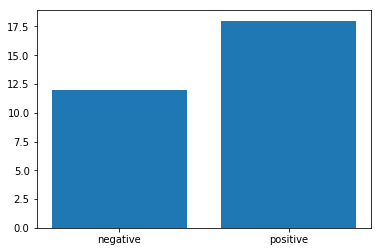

In [9]:
plt.bar(gR.index, gR)

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Commentaire'], 
                                                    df['Classe'], 
                                                    random_state=591)

In [11]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.series.Series'>
(22,)


In [12]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.series.Series'>
(8,)


In [13]:
X_train.head()

113                                             prix stp
265    mala hana ncharkou mafam 7ata chay wele trab7o...
44     انا تعجبني اورنج عندي زوز بيسات ويعجبني فيها ا...
257    ou ki el 3ada  bech tkdbou  3lina  b 199 mba3e...
2      brabi orange pk l connexion ma t7ebech temchil...
Name: Commentaire, dtype: object

In [14]:
y_train.head()

113    positive
265    negative
44     positive
257    negative
2      negative
Name: Classe, dtype: object

In [62]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [63]:
vect = CountVectorizer()

# Fit the CountVectorizer to the training data
#  i.e. learn the vocabulary (distinct words) of the input corpus
vect.fit(X_train)
len(vect.get_feature_names())

182

In [64]:
# the document-term matrix for the training corpus
X_train_vectorized = vect.transform(X_train)
print(type(X_train_vectorized))
print(X_train_vectorized.shape)

# the document-term matrix for the test corpus
X_test_vectorized = vect.transform(X_test)
print(type(X_test_vectorized))
print(X_test_vectorized.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(22, 182)
<class 'scipy.sparse.csr.csr_matrix'>
(8, 182)


In [68]:
# Number of non-zero elements in document-term matrix of training corpus
print(X_train_vectorized.nnz)
print(X_train_vectorized)

222
  (0, 86)	1
  (0, 95)	1
  (1, 15)	1
  (1, 28)	1
  (1, 29)	1
  (1, 40)	1
  (1, 42)	1
  (1, 45)	1
  (1, 48)	1
  (1, 49)	1
  (1, 54)	1
  (1, 60)	1
  (1, 61)	1
  (1, 63)	1
  (1, 74)	1
  (1, 77)	1
  (1, 88)	1
  (1, 98)	2
  (1, 107)	1
  (1, 108)	1
  (1, 111)	1
  (1, 113)	1
  (2, 4)	1
  (2, 19)	1
  (2, 25)	1
  :	:
  (19, 51)	1
  (19, 72)	1
  (19, 76)	1
  (19, 92)	1
  (19, 102)	1
  (20, 0)	1
  (20, 9)	1
  (20, 10)	1
  (20, 16)	1
  (20, 18)	1
  (20, 34)	1
  (20, 56)	1
  (20, 77)	1
  (20, 78)	1
  (20, 87)	1
  (20, 100)	1
  (20, 101)	1
  (20, 109)	1
  (20, 112)	1
  (21, 79)	1
  (21, 81)	1
  (21, 127)	1
  (21, 131)	1
  (21, 139)	2
  (21, 167)	1


In [69]:
# Number of training documents that contain each word (called document frequency)
doc_freq = np.array((X_train_vectorized > 0).sum(0))
print(doc_freq.shape)
print(np.amin(doc_freq))
print(np.amax(doc_freq))

(1, 182)
1
4


In [70]:
# Proportion of training documents that contain each word (called relative document frequency)
n,m = X_train_vectorized.shape
rel_doc_freq = np.array((X_train_vectorized > 0).sum(0)/n)

print(rel_doc_freq.shape)
print(np.amin(rel_doc_freq))
print(np.amax(rel_doc_freq))

(1, 182)
0.0454545454545
0.181818181818


In [71]:
# Number of unique words in each training document
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(22, 1)
1
24


(array([ 3.,  2.,  5.,  5.,  1.,  2.,  0.,  0.,  1.,  3.]),
 array([  1. ,   3.3,   5.6,   7.9,  10.2,  12.5,  14.8,  17.1,  19.4,
         21.7,  24. ]),
 <a list of 10 Patch objects>)

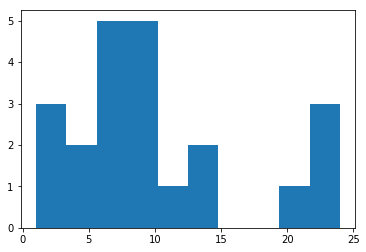

In [72]:
# Plot histogram of number of unique words in each document
plt.hist(words_per_doc)